In [1]:
import matplotlib.pyplot as plt
import mltools as ml
import numpy as np
import mltools.logistic2 as lc2
reload(lc2) 
%matplotlib inline
iris = np.genfromtxt("data/iris.txt",delimiter=None)
X, Y = iris[:,0:2], iris[:,-1] # get first two features & target
X,Y = ml.shuffleData(X,Y) # reorder randomly (important later)
X,_ = ml.transforms.rescale(X) # works much better on rescaled data
XA, YA = X[Y<2,:], Y[Y<2] # get class 0 vs 1
XB, YB = X[Y>0,:], Y[Y>0] # get class 1 vs 2

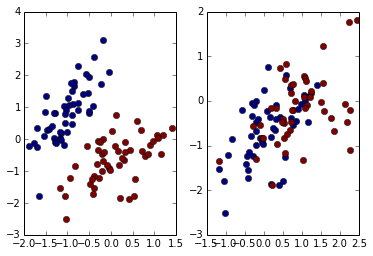

In [2]:
# ensure seperability
fig, ax = plt.subplots(1,2)
ml.plotClassify2D(None, XA[:,[0,1]],YA,axis=ax[0])
ml.plotClassify2D(None, XB[:,[0,1]],YB,axis=ax[1])
plt.show()

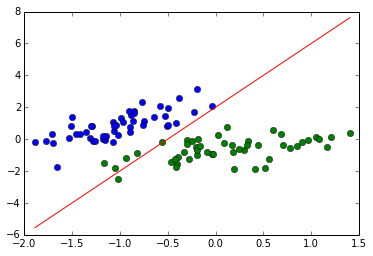

0.0505050505051
0.545454545455


In [3]:
# Test of plot boundary
learner = lc2.logisticClassify2();
learner.theta=[[.5, 1, -.25]]
learner.classes=np.unique(YA)
learner.plotBoundary(XA, YA)
plt.show()
print learner.err(XA, YA)
print learner.err(XB, YB)

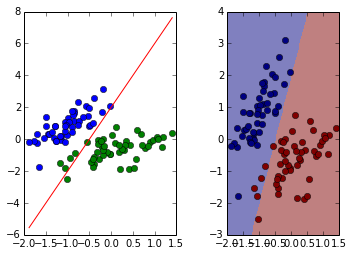

In [4]:
fig, ax = plt.subplots(1,2)
learner.plotBoundary(XA,YA,axis=ax[0])
ml.plotClassify2D(learner, XA, YA,axis=ax[1])
plt.show()

The derivation ended up being: <ul><li>(all at j) :: -y(1 - sigma(theta * x)) * xOne + (1 - y)sigma(theta * x) * xOne</li><li>(all at j) :: -y(1 - sigma(theta * x)) * xTwo + (1 - y)sigma(theta * x) * xTwo</li><li>(all at j) :: -y(1 - sigma(theta * x))+ (1 - y)sigma(theta * x)</li></ul>

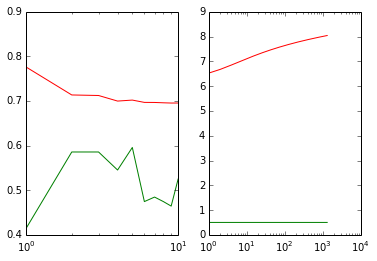

In [5]:
import mltools.logistic2 as lc2
import matplotlib.pyplot as plt
import mltools as ml
import numpy as np
import mltools.logistic2 as lc2
reload(lc2) 
%matplotlib inline
iris = np.genfromtxt("data/iris.txt",delimiter=None)
X, Y = iris[:,0:2], iris[:,-1] # get first two features & target
X,Y = ml.shuffleData(X,Y) # reorder randomly (important later)
X,_ = ml.transforms.rescale(X) # works much better on rescaled data
XA, YA = X[Y<2,:], Y[Y<2] # get class 0 vs 1
XB, YB = X[Y>0,:], Y[Y>0] # get class 1 vs 2
fig, ax = plt.subplots(1,2)
learner = lc2.logisticClassify2(XA, YA, plot=ax[0])
learner = lc2.logisticClassify2(XB, YB, plot=ax[1])
plt.show()

In [12]:
#Demonstrating L2 penalization. 
import matplotlib.pyplot as plt
import mltools as ml
import numpy as np
import mltools.logistic2 as lc2
reload(lc2) 
%matplotlib inline
iris = np.genfromtxt("data/iris.txt",delimiter=None)
X, Y = iris[:,0:2], iris[:,-1] # get first two features & target
X,Y = ml.shuffleData(X,Y) # reorder randomly (important later)
X,_ = ml.transforms.rescale(X) # works much better on rescaled data
XA, YA = X[Y<2,:], Y[Y<2] # get class 0 vs 1
XB, YB = X[Y>0,:], Y[Y>0] # get class 1 vs 2

learner = lc2.logisticClassify2(XA, YA)
print learner.err(XB,YB)
learner = lc2.logisticClassify2(XA, YA, alpha=2)
print learner.err(XB,YB)

0.808080808081
0.89898989899


<h2>part two</h2>
#	a.) Can shatter a b and c but not d. There is no way to make points (2,2) and (8,7) in the same class
#	b.) Most points can be shatter. Since c can skew the origin point, you can scatter each point in c, 
#		but not in d. 
#	c.) Can up to d. You can not put point (2,2) and 8,7 in the same class with 4,8 and 6,4 in the same class.